<a href="https://colab.research.google.com/github/Bansalnitika21/Nitikabansal21.github.io/blob/devil/predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING THE DIFFERENCE BETWEEN AN IMAGE OF ORGANIC OR RECYCLABLE WASTE**

### **MOUNTING DRIVE**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**LOCATING IN DRIVE**

LOCATION IS drive

In [2]:
cd drive

/content/drive


LOCATION IS drive/My Drive

In [3]:
cd My Drive

/content/drive/My Drive


LOCATION IS drive/My Drive/Colab Notebooks

In [4]:
cd Colab Notebooks

/content/drive/My Drive/Colab Notebooks


LOCATION IS drive/My Drive/Colab Notebooks/waste_classification

In [5]:
cd waste_classification

/content/drive/My Drive/Colab Notebooks/waste_classification


### **DEFINNING My_Dir SO THAT WE CAN ACCESS THE LONG LOCATION IN SHORT**

In [6]:
my_dir="/content/drive/My Drive/Colab Notebooks/waste_classification"

### **IMPORTING LIBRARIES**

RELOAD

MATPLOTLIB

FASTAI

WARNINGS

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

###**PREDICTION FUNCTION**

THIS WILL LOAD THE SAVED MODEL THAT IS .PKL FILE FROM **MY_DIR**

In [8]:
predictor = load_learner(my_dir)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

DEFINING MY_PREDICTOR

In [9]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

YOU CAN REPLACE **R** WITH **O** SO THAT YOU CAN ACCESS ORGANIC AND RECYCLABLE FOLDERS

OS.LISTDIR IS USED TO SHOW THAT THERE ARE TWO FOLDER AT LOCATION TEST

In [10]:
all_test_images=os.listdir("/content/drive/My Drive/Colab Notebooks/waste_classification/dataset/DATASET/TEST/R/")
os.listdir("/content/drive/My Drive/Colab Notebooks/waste_classification/dataset/DATASET/TEST/")

['O', 'R']

YOU CAN CHANGE THE VALUE OF IDX TO 0 TO ACCESS THE ORGANIC **O** FOLDER 

USIND IDX AS 1 YOU WILL GET ALL THE IMAGES FROM RECYCLABLE **R** FOLDER

R


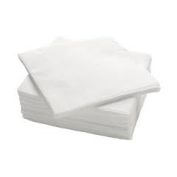

In [12]:
idx=1
print(my_predictor("/content/drive/My Drive/Colab Notebooks/waste_classification/dataset/DATASET/TEST/R/"+all_test_images[idx]))
img = open_image("/content/drive/My Drive/Colab Notebooks/waste_classification/dataset/DATASET/TEST/R/"+all_test_images[idx])
img.show()

### **CREATING FOLDER AND STORING IMAGES**

YOU CAN REPLACE **R** WITH **O**

In [13]:
import cv2
test_files=os.listdir("/content/drive/My Drive/Colab Notebooks/waste_classification/dataset/DATASET/TEST/R/")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("/content/drive/My Drive/Colab Notebooks/waste_classification/dataset/DATASET/TEST/R/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


THIS CELL WILL CREATE A MY_FINAL_OUTPUTR OR MY_FINAL_OUTPUTO FILE IN WASTE_CLASSIFICATION FOLDER

**NOTE**: YOU HAVE TO CHANGE **R** TO **O**

In [14]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv422p ../my_final_outputR.mp4
%cd ..

/content/drive/My Drive/Colab Notebooks/waste_classification/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enabl

### **FOR COVERTING IMAGES TO VIDEO**

In [15]:
!pip install -U kora
from kora.drive import upload_public


Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.4.23)


In [16]:
url = upload_public('my_final_outputR.mp4')

This cell will display the created video in colab notebook!!

In [17]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

YOU CAN COPY THIS LINK CREATED AND PASTE ANYWHERE AND THE VIDEO WILL BE VISIBLE AND WORKING!!!!!

In [18]:
url

'https://drive.google.com/uc?id=1kPAhy3Pa3_NalqHEYnLj6WZOa6baRXdT'